In [1]:
import numpy as np
import pandas as pd
from math import exp
np.random.seed(2)

In [2]:
###基础参数设置

epsilon = 0.1
alpha=0.1
gamma=0.9
### 二叉树系数设置
stock0=1
timelen=15
sigma=0.007 ## volatility
r=0.002

## bi tree parameter
u=exp(sigma)
d=exp(-sigma)
a=exp(r)
prob_u=(a-d)/(u-d)
prob_d=1-prob_u
price=np.zeros([timelen,timelen])

## 建立价格二叉树
for n in range(timelen):
    for m in range(n+1):
        price[m,n]=stock0*np.power(d,m)*np.power(u,n-m)

In [3]:
## 价格二叉树如下图
pd.DataFrame(price)## 二叉树价格走势 上三角矩阵就是整个二叉树

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,1.007025,1.014098,1.021222,1.028396,1.035620,1.042894,1.050220,1.057598,1.065027,1.072508,1.080042,1.087629,1.095269,1.102963
1,0.0,0.993024,1.000000,1.007025,1.014098,1.021222,1.028396,1.035620,1.042894,1.050220,1.057598,1.065027,1.072508,1.080042,1.087629
2,0.0,0.000000,0.986098,0.993024,1.000000,1.007025,1.014098,1.021222,1.028396,1.035620,1.042894,1.050220,1.057598,1.065027,1.072508
3,0.0,0.000000,0.000000,0.979219,0.986098,0.993024,1.000000,1.007025,1.014098,1.021222,1.028396,1.035620,1.042894,1.050220,1.057598
4,0.0,0.000000,0.000000,0.000000,0.972388,0.979219,0.986098,0.993024,1.000000,1.007025,1.014098,1.021222,1.028396,1.035620,1.042894
5,0.0,0.000000,0.000000,0.000000,0.000000,0.965605,0.972388,0.979219,0.986098,0.993024,1.000000,1.007025,1.014098,1.021222,1.028396
6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.958870,0.965605,0.972388,0.979219,0.986098,0.993024,1.000000,1.007025,1.014098
7,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.952181,0.958870,0.965605,0.972388,0.979219,0.986098,0.993024,1.000000
8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.945539,0.952181,0.958870,0.965605,0.972388,0.979219,0.986098
9,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.938943,0.945539,0.952181,0.958870,0.965605,0.972388


In [4]:
## 上涨概率
prob_u

0.6412489346040974

In [5]:
a

1.0020020013340003

In [6]:
## 跌幅
d

0.9930244429332351

In [7]:
## 涨幅
u

1.0070245572668486

### Reward Calculate


In [8]:
## Action设置
Action=[0,0.5,1]

In [9]:

### 用之前abs的思路界定每一个action的reward 
### s(n)节点决定action，s(n+1)节点计算reward
def re_f(s0,s_u,s_d,action):
    return -abs((s0-s_u)*(1-action)*prob_u)-abs((s0-s_d)*(1-action)*prob_d)
    ### 此处prob 是股票价格未来向上/向下的价格
    ## 此函数可以后期修改
    
def g_cal(price,m,n,action):
    s0=price[m,n]
    s_u=price[m,n+1]
    s_d=price[m+1,n+1]
    reward=re_f(s0,s_u,s_d,action)
    return reward


## 建立Reward的dataframe index为对应的price节点 （M,N)
G=pd.DataFrame()

for m in range(timelen-1):
           
    for n in range(m,timelen-1):
#         print([m,n,g_cal(price,m,n,Action[0]),g_cal(price,m,n,Action[1]),g_cal(price,m,n,Action[2])])
        
        temp=pd.DataFrame([m,n,g_cal(price,m,n,Action[0]),g_cal(price,m,n,Action[1]),g_cal(price,m,n,Action[2])])
        G=pd.concat([G,temp.T],axis=0)
###G 这个dataframe记录了，每个节点对应的action下的reward
G1=G
G1.columns=["m",'n','A1','A2','A3']
G=G1.set_index(['m','n'])### mn节点可以使用 G2.loc[m,n]来调取对应的可能的reward

In [10]:
G

A1        A2   A3
m    n                            
0.0  0.0  -0.007007 -0.003503 -0.0
     1.0  -0.007056 -0.003528 -0.0
     2.0  -0.007106 -0.003553 -0.0
     3.0  -0.007156 -0.003578 -0.0
     4.0  -0.007206 -0.003603 -0.0
...             ...       ...  ...
11.0 12.0 -0.006533 -0.003267 -0.0
     13.0 -0.006579 -0.003290 -0.0
12.0 12.0 -0.006442 -0.003221 -0.0
     13.0 -0.006488 -0.003244 -0.0
13.0 13.0 -0.006397 -0.003199 -0.0

[105 rows x 3 columns]

In [24]:
## 建立Q 表格
def build_q_table(G, Actions):
    Q = pd.DataFrame(np.zeros((G.shape[0], len(Actions))),columns=['A1','A2','A3']) 
    Q.index=G.index
    return Q

In [25]:
## 判断是否为倒数第二个节点，因为倒数第二个节点计算Q（S,A）时 无法计算Q(S,a)
def is_terminal(state):
    m, n = state
    return (n == timelen - 1)


In [26]:
## Epsilon Greedy 
def choose_action(state,Q): ## state=[M,N]
    state_act=Q.loc[tuple(state),:]
    if (np.random.uniform()<epsilon) or (state_act.all()==0):## 当Qvalue三个状态全为0时随机选
        act_idx=np.random.randint(3)
    else:
        act_idx=np.argmax(state_act)
    return act_idx

In [27]:
### 取下一个State的action 以及更新出来的Q
def next_state(state,Q,G,act):
    
    if not is_terminal(state):
        ## 如果不是最后一层二叉树 仍有下一个state
        p=np.random.random()
        M,N=state
        if p<prob_u:##上涨
            N+=1

        else:
            N+=1## 下跌
            M+=1
        new_state=[M,N]
        
        R=G.loc[tuple(state)][act]
        if N!=timelen-1:## 如果当前state是倒数第二层，下一个state是最后一层时，没有Q（S’,a）
            act_idx=choose_action(new_state,Q)
            Q.loc[tuple(state)][act]=(1-alpha)*Q.loc[tuple(state)][act]+alpha*(R+Q.loc[tuple(new_state)][act_idx])
            act=act_idx
        else:
             Q.loc[tuple(state)][act]=(1-alpha)*Q.loc[tuple(state)][act]+alpha*R   
    return Q,new_state,act,R    
        

In [28]:
def test(Q):
    temp=np.zeros([timelen-1,4])
    M=0
    N=0
    s=1
    for t in range(timelen-1):
        s0=price[M,N]
        p=np.random.random()
        g_=Q.loc[M,N]
        act=Action[np.argmax(g_)]

        temp[t,0:2]=[M,N]        

        if p<prob_u:##上涨
            N+=1

        else:
            N+=1## 下跌
            M+=1
        s1=price[M,N] ## action之后下一个节点的price
        
        risk=abs((s0-s1)*(1-act))
        temp[t,2:]=[act,risk]
        Risk=sum(temp[:,-1])
        count=temp[:,2]###计数列
        count0=sum(count==0)
        count1=sum(count==0.5)
        count2=sum(count==1)
        tempResult=[Risk,count0,count1,count2]
    return tempResult


In [29]:
learnT=5000
Q=build_q_table(G, Action)
state=[0,0]

result= np.zeros([learnT,5])
for i in range(learnT):
    state=[0,0]
    while not is_terminal(state):
        if state==[0,0]:
            act=choose_action(state,Q)
        Q,state,act,R=next_state(state,Q,G,act)
    
    l1=test(Q)
    l1.append(i)
    result[i,:]=l1
    
        

In [30]:
## Risk count0 count1 count2 i 

In [31]:
np.random.randint(3)

0

In [32]:
l1

[0.0, 0, 0, 14, 4999]

In [33]:
# if not is_terminal(state):
#         p=np.random.random()
#         M,N=state
#         if p<prob_u:##上涨
#             N+=1

#         else:
#             N+=1## 下跌
#             M+=1
#         new_state=[M,N]
#         act_idx=choose_action(state,Q)
#         R=G.loc[tuple(state)][act]
#         Q.loc[tuple(state)][act]=(1-alpha)*Q.loc[tuple(state)][act_idx]+alpha*(R+Q.loc[tuple(new_state)][act_idx])    
        

In [34]:
# if not is_terminal(state):
#     print (0)
# else :
#     print(1)

In [35]:
Q

A1        A2        A3
m    n                                 
0.0  0.0  -0.013906 -0.010602 -0.006777
     1.0  -0.014102 -0.010133 -0.006584
     2.0  -0.013345 -0.009765 -0.006916
     3.0  -0.012412 -0.009007 -0.005904
     4.0  -0.010898 -0.008345 -0.006353
...             ...       ...       ...
11.0 12.0  0.000000  0.000000  0.000000
     13.0  0.000000 -0.000329  0.000000
12.0 12.0  0.000000  0.000000  0.000000
     13.0  0.000000  0.000000  0.000000
13.0 13.0  0.000000  0.000000  0.000000

[105 rows x 3 columns]

In [36]:
result

array([[8.68797171e-02, 1.10000000e+01, 3.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [9.11249599e-02, 1.30000000e+01, 0.00000000e+00, 1.00000000e+00,
        1.00000000e+00],
       [8.04404350e-02, 1.10000000e+01, 1.00000000e+00, 2.00000000e+00,
        2.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.40000000e+01,
        4.99700000e+03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.40000000e+01,
        4.99800000e+03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.40000000e+01,
        4.99900000e+03]])

In [37]:
pd.DataFrame(result,columns=['Risk','count0','count1','count2','i'])

,Risk,count0,count1,count2,i
0,0.086880,11.0,3.0,0.0,0.0
1,0.091125,13.0,0.0,1.0,1.0
2,0.080440,11.0,1.0,2.0,2.0
3,0.076346,9.0,3.0,2.0,3.0
4,0.075156,9.0,3.0,2.0,4.0
...,...,...,...,...,...
4995,0.000000,0.0,0.0,14.0,4995.0
4996,0.000000,0.0,0.0,14.0,4996.0
4997,0.000000,0.0,0.0,14.0,4997.0
4998,0.000000,0.0,0.0,14.0,4998.0


In [38]:
result.T[4]

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 4.997e+03, 4.998e+03,
       4.999e+03])

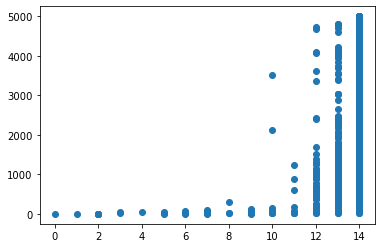

In [39]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(result.T[3], result.T[4]) ### x= i 第四列 Y=Risk 第0列
plt.show()

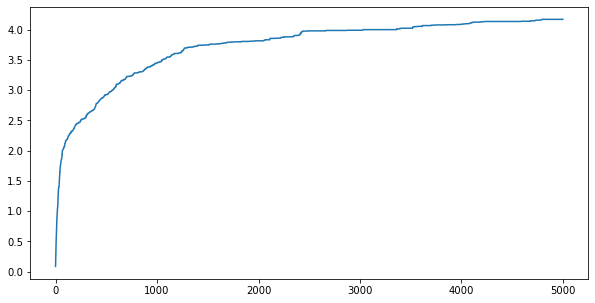

In [40]:
plt.figure(figsize = (10,5))
plt.plot(np.cumsum(result.T[0]))
plt.show()

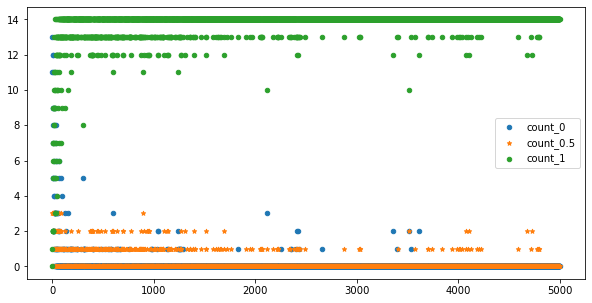

In [43]:
### 这个图 我想比较一下 随着Q学习的变化，选择各个action 个数的变化
plt.figure(figsize = (10,5))
plt.scatter(result.T[4],result.T[1], s = 20)
plt.scatter(result.T[4],result.T[2], s = 20, marker = '*')
plt.scatter(result.T[4],result.T[3], s = 20)
plt.legend(['count_0','count_0.5','count_1'])
plt.show()

In [45]:
Q.to_csv('./Q.csv')

In [46]:
Q

A1        A2        A3
m    n                                 
0.0  0.0  -0.013906 -0.010602 -0.006777
     1.0  -0.014102 -0.010133 -0.006584
     2.0  -0.013345 -0.009765 -0.006916
     3.0  -0.012412 -0.009007 -0.005904
     4.0  -0.010898 -0.008345 -0.006353
...             ...       ...       ...
11.0 12.0  0.000000  0.000000  0.000000
     13.0  0.000000 -0.000329  0.000000
12.0 12.0  0.000000  0.000000  0.000000
     13.0  0.000000  0.000000  0.000000
13.0 13.0  0.000000  0.000000  0.000000

[105 rows x 3 columns]